# Simulation example with *thztools*

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import default_rng
from matplotlib.figure import figaspect
from scipy.signal import periodogram

from thztools.thztools import thzgen, sigmamu

## Simulate noisy terahertz time-domain waveforms

The cell below sets the parameters for the simulation, and the subsequent cell generates `n_sim = 11` noisy terahertz time-domain waveforms, each with `n = 256` samples, and stores them in an `(n_sim, n)` NumPy array `x`. The function `thzgen` produces the ideal waveform `mu` and measurement times `t`, and the function `sigmamu` returns the noise amplitude `sigma` at each point in the waveform. We use the SciPy `periodogram` function to compute the power spectral density `psd` of the first 11 noisy waveforms at the discrete frequencies `f`.

The next cell generates a figure shows (a) $y(t)$ and $\sigma(t)$ and (b) the power spectral density `psd` of the first 11 waveforms in `x` as a function of frequency `f`.

In [2]:
n = 256     # Number of samples
ts = 0.05   # Sampling time [ps]
t0 = 2.5    # Peak pulse time [ps]
fs = 1 / ts # Sampling frequency [THz]

sigma_alpha = 1e-4  # Additive noise amplitude [signal units]
sigma_beta = 1e-2   # Multiplicative noise amplitude [dimensionless]
sigma_tau = 1e-3    # Time base noise amplitude [ps]
sigma_amp = np.array([sigma_alpha, sigma_beta, sigma_tau])

seed = 0    # RNG seed
rng = default_rng(seed)

In [3]:
mu, t = thzgen(n, ts, t0)
sigma = sigmamu(sigma_amp, mu, ts)

# Use broadcasting to generate multiple simulated noisy measurements of y
n_sim = 11
x = mu + sigma * rng.standard_normal((n_sim, n))

# Compute power spectral density
f, psd = periodogram(x, fs=fs, detrend=False)

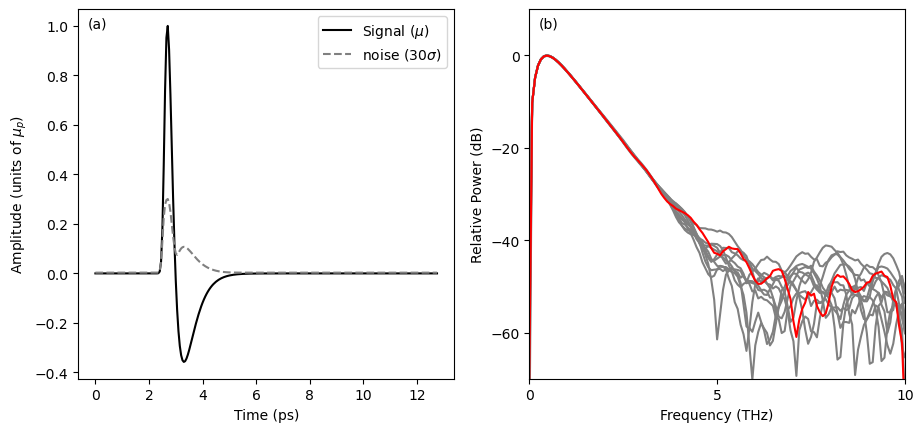

In [4]:
w, h = figaspect(0.45)
_, axs = plt.subplots(1, 2, figsize=(w, h))

axs[0].plot(t, mu, c='k', label=r'Signal ($\mu$)')
axs[0].plot(t, sigma * 30, ls='--', c='grey', label=r'noise $(30 \sigma$)')

axs[0].legend()
axs[0].text(0.025, 0.95, '(a)', transform=axs[0].transAxes)

axs[0].set_xlabel('Time (ps)')
axs[0].set_ylabel(r'Amplitude (units of $\mu_{p})$')

axs[1].plot(f, 10 * np.log10(psd[1:, :].T / max(psd.flatten())), c='grey')
axs[1].plot(f, 10 * np.log10(psd[0, :].T / max(psd.flatten())), c='red')

axs[1].text(0.025, 0.95, '(b)', transform=axs[1].transAxes)

axs[1].set_xlabel('Frequency (THz)')
axs[1].set_ylabel('Relative Power (dB)')

axs[1].set_xticks(np.arange(0, 11, 5))
axs[1].set_xlim(0, 10)
axs[1].set_yticks(np.arange(-60, 10, 20))
axs[1].set_ylim(-70, 10)

plt.show()